# Benchmark Algo on a simple problem
Minimizing the sinus between 0 and 2pi leads to 2pi / 3

In [1]:
import numpy as np
import pandas as pd
import tqdm
from joblib import Parallel, delayed

from itertools import product

from benderopt import minimize

In [2]:
optimization_problem = [
    {
        "name": "x1",
        "category": "uniform",
        "search_space": {
            "low": 0,
            "high": 2 * np.pi,
        }
    },
]


def function_to_optimize(x1):
    return np.sin(x1)


target = 3 * np.pi / 2

In [3]:
seeds = list(range(10))
methods = ["random", "parzen_estimator", "model_based_estimator"]
number_of_evaluations = [5, 10, 20, 30, 35, 40, 45, 50, 55, 60, 70, 80, 100, 150]

In [4]:
results_tmp = {}

trials = list(product(seeds, number_of_evaluations, methods))
print("Number of trials:", len(trials))
best_samples = Parallel(n_jobs=-1, verbose=8)(
    delayed(minimize)(
        function_to_optimize,
        optimization_problem,
        optimizer_type=method,
        number_of_evaluation=number_of_evaluation,
        seed=seed,
    ) for seed, number_of_evaluation, method in trials
)

for (seed, number_of_evaluation, method), best in zip(trials, best_samples):
    results_tmp.setdefault(method, {}).setdefault(number_of_evaluation, []).append(np.abs(best["x1"] - target))


Number of trials: 420


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:  1.7min finished


In [8]:
results = {
    method: {
        n: {
            "mean": np.mean(values),
            "std": np.std(values),
        }
        for n, values in ns.items()
    }
    for method, ns in results_tmp.items()
}

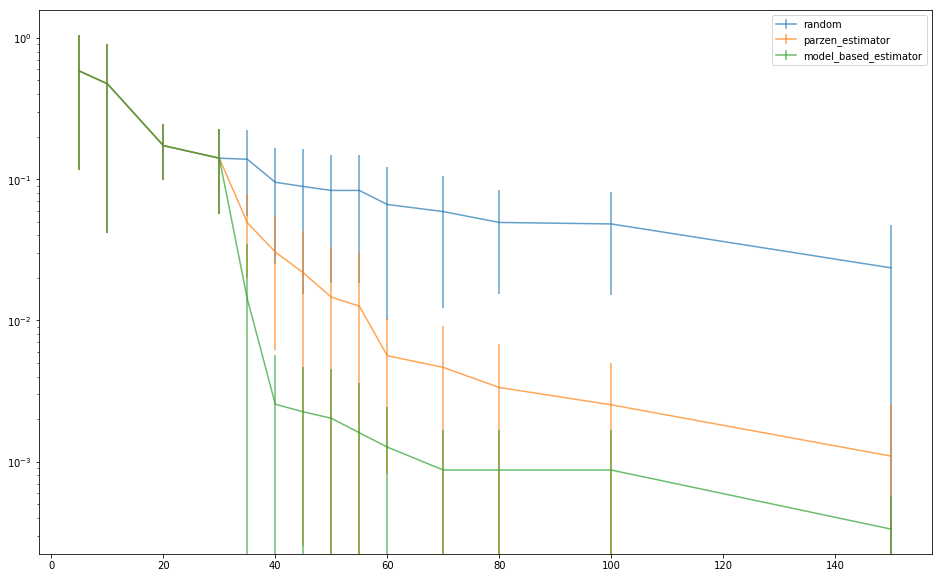

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
for method in methods:
    plt.errorbar(
        x=number_of_evaluations,
        y=[results[method][number_of_evaluation]["mean"] for number_of_evaluation in number_of_evaluations],
        yerr=[results[method][number_of_evaluation]["std"] for number_of_evaluation in number_of_evaluations],
        label=method,
        alpha=0.7
    )
    plt.legend()
    plt.yscale("log")